In [2]:
import yaml
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

from scripts import *

plt.rcParams['font.size'] = 16

In [3]:
path = '/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc'

In [9]:
modeldir = '/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/models/'
uv_spec = np.loadtxt(os.path.join(modeldir, 'uv_enhanced/starspec.txt'))
spec = np.loadtxt(os.path.join(modeldir, 'baseline/starspec.txt'))

Text(0, 0.5, 'flux')

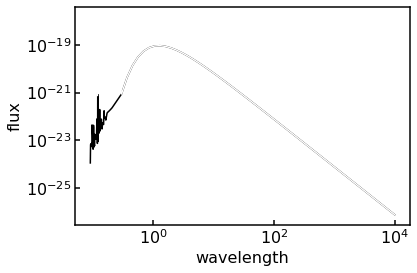

In [10]:
plt.plot(spec[0], spec[1], 'k')
plt.plot(uv_spec[0], uv_spec[1], 'w')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('wavelength');plt.ylabel('flux')

/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/models/baseline/model_inputs.yaml
baseline
saved star spectrum
Saved radmc setup files in /Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/models/baseline
completed thermal mc
Reading amr_grid.inp
Reading wavelength_micron.inp
Reading dust_density.inp
Reading dust_temperature.dat
Saved gas disk data


/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:41: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("BuPu").copy()
  dcmap.set_under('w')
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:42: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("BuPu").copy()
  dcmap.set_over(dcmap(1.0))
/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/scripts/plot_summary.py:45: MatplotlibDeprecationWarning: You are modifying the state of a globa

plotted baseline summary figure


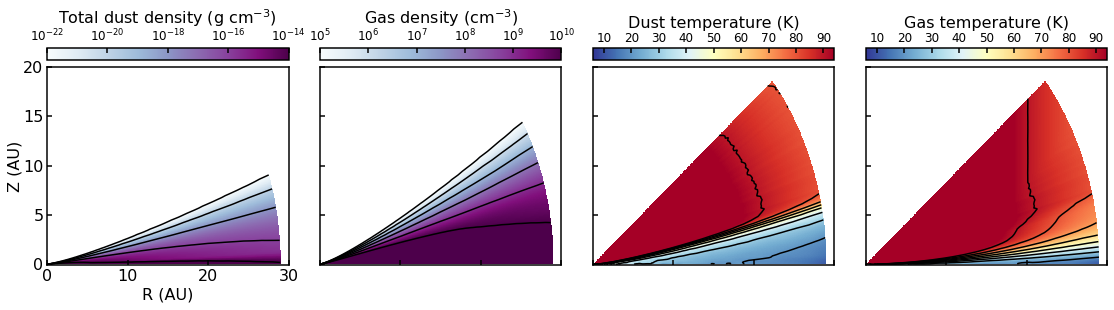

In [7]:
norm = setup(PATH=path, models=['baseline'], uv=False)

/Users/arcticfox/Documents/GitHub/disks_and_outbursts/radmc/models/uv_enhanced/model_inputs.yaml
uv_enhanced
saved star spectrum
0.05 30.0
[9.13241822e-02 9.15922076e-02 9.18870355e-02 9.22086660e-02
 9.30931498e-02 9.42188564e-02 9.57197986e-02 9.63630595e-02
 9.68991103e-02 9.71939383e-02 9.75155687e-02 9.83196449e-02
 9.89629058e-02 9.98473896e-02 1.00383440e-01 1.00705071e-01
 1.01616357e-01 1.02045198e-01 1.02366828e-01 1.02742064e-01
 1.03063694e-01 1.03867770e-01 1.04269809e-01 1.04671847e-01
 1.05998572e-01 1.07164483e-01 1.07405706e-01 1.07646929e-01
 1.07727336e-01 1.07807744e-01 1.08209782e-01 1.12149755e-01
 1.15406264e-01 1.17456658e-01 1.19064810e-01 1.19547256e-01
 1.20351332e-01 1.20624718e-01 1.20994593e-01 1.21235816e-01
 1.21503841e-01 1.21798669e-01 1.22200707e-01 1.22441930e-01
 1.22683153e-01 1.23326414e-01 1.23728452e-01 1.23969675e-01
 1.24452121e-01 1.24773751e-01 1.26301496e-01 1.28526106e-01
 1.30563099e-01 1.32600092e-01 1.34154640e-01 1.36030817e-01
 1.3924

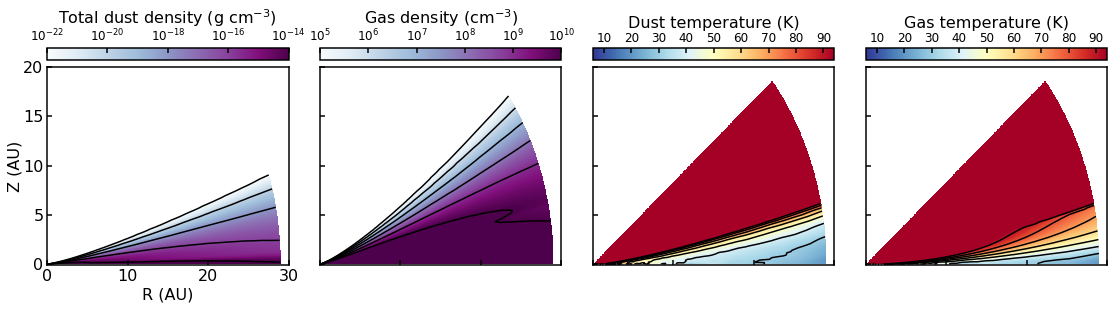

In [8]:
uv = setup(PATH=path, models=['uv_enhanced'],
           star_params={'L_uv_star':2.9e33}, uv=True)